# 事前準備

## ライブラリ

In [ ]:
# library
import requests
import pandas as pd
import numpy as np
from skimpy import skim
from plotnine import *
from io import StringIO
import os

## フォント

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [4]:
font_path='c:\\WINDOWS\\Fonts\\meiryo.ttc'
font_prop=fm.FontProperties(fname=font_path)
plt.rcParams['font.family']=font_prop.get_name()
plt.rcParams['axes.unicode_minus']=False

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# ★★★ ここをあなたの環境の正確なフォントパスに書き換えてください ★★★
font_path = 'C:/Windows/Fonts/meiryo.ttc' # 例: メイリオ
# font_path = 'C:/Windows/Fonts/YuGothR.ttc' # 例: 游ゴシック (Regular)
# font_path = 'C:/Windows/Fonts/msgothic.ttc' # 例: MS Gothic

# フォントファイルが存在するか確認
if not os.path.exists(font_path):
    print(f"エラー: 指定されたフォントファイルが存在しません: {font_path}")
    # 他のフォントパスを試すか、フォントが本当にそこにあるか確認してください。
else:
    print(f"使用するフォント: {font_path}")
    font_prop = fm.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['axes.unicode_minus'] = False # マイナス記号の文字化け防止
    print(f"Matplotlib のフォント設定: {plt.rcParams['font.family']}")

# ここからplotnineのコード
# (あなたの実際のplotnineプロットコードをここに記述)
# import pandas as pd
# from plotnine import ggplot, aes, geom_line, geom_point, labs
# ...
# p = (
#     ggplot(df, aes(x='Year', y='Value', color='Country'))
#     + geom_line()
#     + geom_point()
#     + labs(
#         title="各国20-24歳失業率 (年)",
#         x="年",
#         y="失業率 (若年層20~24歳)"
#     )
# )
# print(p)

使用するフォント: C:/Windows/Fonts/meiryo.ttc
Matplotlib のフォント設定: ['Meiryo']


## OECD データ取得

In [6]:
# URL
url='https://sdmx.oecd.org/public/rest/data/OECD.ELS.SAE,DSD_LFS@DF_LFS_INDIC,1.1/USA+GBR+DEU+FRA+CAN+KOR+ITA+JPN.UNE_RATE.PT_LF_SUB._T.Y20T24.UNE?startPeriod=1960&endPeriod=2023&dimensionAtObservation=AllDimensions&format=csvfile'

# Fetch data
response = requests.get(url)

# Load into pandas DataFrame
df = pd.read_csv(StringIO(response.text))

# データハンドリング

In [7]:
df.head()

# cols_obj=df.select_dtypes(include='object')
# cols_obj.columns

# for col in cols_obj.columns:
#     print(f'列 "{col}": {cols_obj[col].value_counts(dropna=False)}')


,DATAFLOW,REF_AREA,MEASURE,UNIT_MEASURE,SEX,AGE,LABOUR_FORCE_STATUS,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,DECIMALS
0,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),CAN,UNE_RATE,PT_LF_SUB,_T,Y20T24,UNE,2006,8.820,A,NaN,1
1,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),FRA,UNE_RATE,PT_LF_SUB,_T,Y20T24,UNE,2006,19.931,A,NaN,1
2,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),DEU,UNE_RATE,PT_LF_SUB,_T,Y20T24,UNE,2006,13.293,A,NaN,1
3,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),ITA,UNE_RATE,PT_LF_SUB,_T,Y20T24,UNE,2006,19.403,A,NaN,1
4,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),JPN,UNE_RATE,PT_LF_SUB,_T,Y20T24,UNE,2006,7.707,A,NaN,1


In [8]:
skim(df_in=df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 409    │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 12     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                    All null                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                                              ┃ NA                      ┃ NA %                       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ UNIT_MULT                                           │                     409 │                        100 │  │
│ └─────────────────────────────────────────────────────┴─────────────────────────┴────────────────────────────┘  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column         ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0       ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ TIME_PERIOD    │   0 │      0 │    1997 │   15.59 │     1960 │   1985 │   1998 │   2011 │   2023 │ ▁▅▇▇▇▇  │  │
│ │ OBS_VALUE      │   0 │      0 │   11.98 │   7.082 │   0.5068 │  7.592 │  9.848 │  15.16 │  39.32 │  ▃▇▂▁▁  │  │
│ │ DECIMALS       │   0 │      0 │       1 │       0 │        1 │      1 │      1 │      1 │      1 │     ▇   │  │
│ └────────────────┴─────┴────────┴─────────┴─────────┴──────────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃           ┃    ┃           ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column    ┃ NA ┃ NA %      ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ DATAFLOW  │  0 │         0 │ OECD.ELS │ OECD.ELS. │ OECD.ELS │ OECD.ELS. │       38 │         1 │      409 │  │
│ │           │    │           │ .SAE:DSD │ SAE:DSD_L │ .SAE:DSD │ SAE:DSD_L │          │           │          │  │
│ │           │    │           │ _LFS@DF_ │ FS@DF_LFS │ _LFS@DF_ │ FS@DF_LFS │          │           │          │  │
│ │           │    │           │ LFS_INDI │ _INDIC(1. │ LFS_INDI │ _INDIC(1. │          │           │          │  │
│ │           │    │           │ C(1.1)   │ 1)        │ C(1.1)   │ 1)        │          │           │          │  │
│ │ REF_AREA  │  0 │         0 │ CAN      │ CAN       │ CAN      │ USA       │        3 │         1 │      409 │  │
│ │ MEASURE   │  0 │         0 │ UNE_RATE │ UNE_RATE  │ 

# プロット

In [9]:
df['REF_AREA'].value_counts()

REF_AREA
USA    64
JPN    56
ITA    54
DEU    54
FRA    49
CAN    48
KOR    44
GBR    40
Name: count, dtype: int64

In [ ]:
# プロットの前処理
ref_area_mapping = {
    'USA': 'アメリカ',
    'JPN': '日本',
    'ITA': 'イタリア',
    'DEU': 'ドイツ',
    'FRA': 'フランス',
    'CAN': 'カナダ',
    'KOR': '韓国',
    'GBR': 'イギリス'
}

df_for_plot = (
    df
    .assign(
        Country=lambda df: pd.Categorical(df['REF_AREA'].replace(ref_area_mapping), ordered=False)
    )   
)

In [ ]:
font_name=font_prop.get_name()

In [34]:
df['TIME_PERIOD'].describe()

count     409.000000
mean     1997.454768
std        15.594699
min      1960.000000
25%      1985.000000
50%      1998.000000
75%      2011.000000
max      2023.000000
Name: TIME_PERIOD, dtype: float64

In [ ]:
year_breaks = np.arange(1960, 2024, 5)
rate_breaks = np.arange(0, 41, 5)

In [41]:
plt=ggplot(data=df_for_plot, 
       mapping=aes(x='TIME_PERIOD', y='OBS_VALUE', colour='Country')
       ) + theme_bw(
           
       ) + geom_line(
       ) + geom_point(
           size=1.0, alpha=0.8
       ) + labs(
           x='Year', 
           y='若年失業率（20～24歳）（%）',
        #    colour='Country'
       ) + scale_x_continuous(
           breaks=year_breaks
        ) + scale_y_continuous(
            breaks=rate_breaks
        ) + theme(
           text=element_text(family=font_name), 
           axis_title=element_text(size=10)
        #    axis_text_x=element_text(size=10)
       )

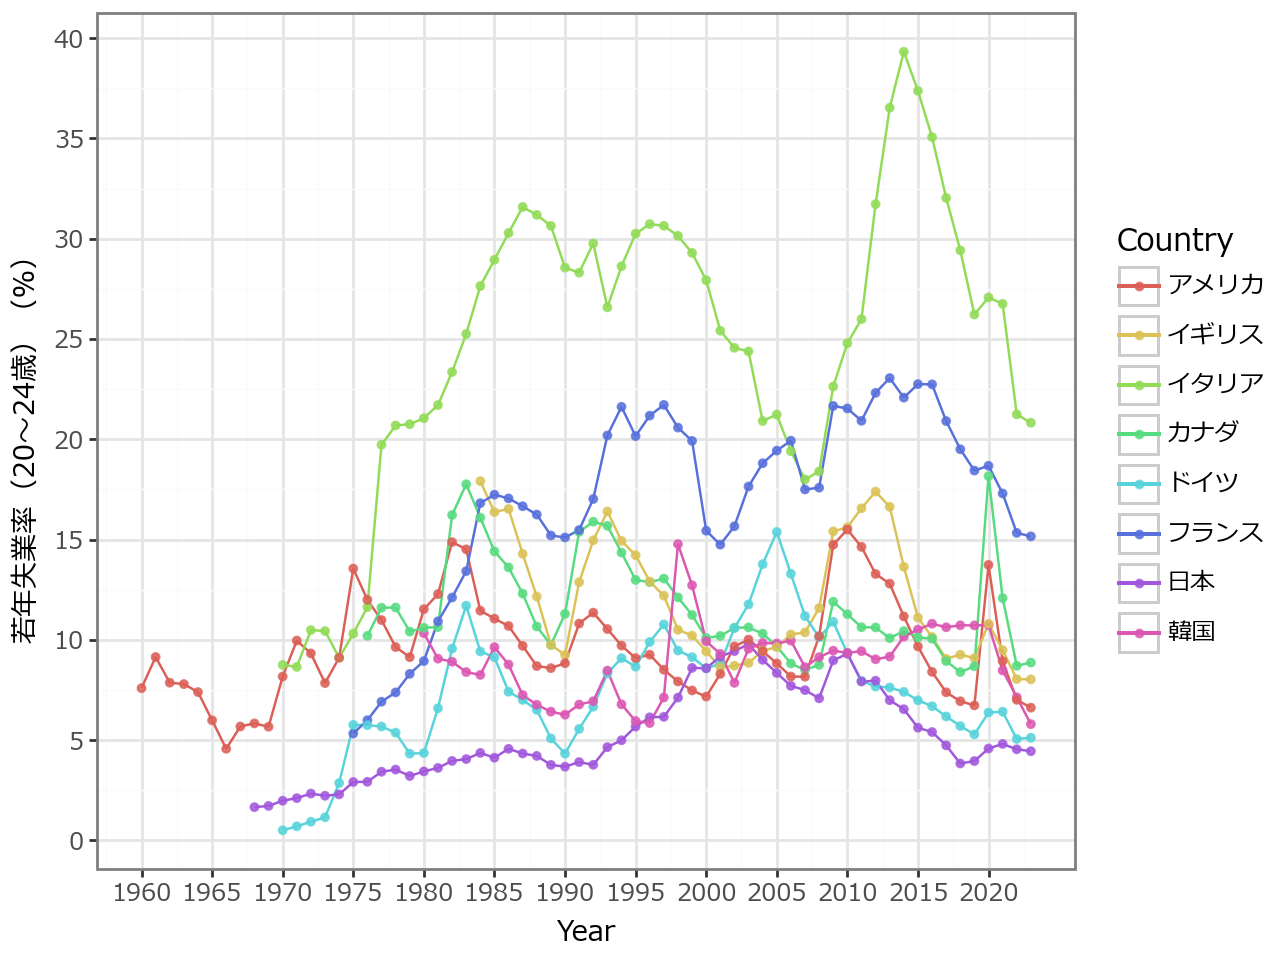

In [42]:
plt